In [23]:
import numpy as np
import pandas as pd
import time, pickle
from astropy.io import ascii
import matplotlib.pyplot as plt
from collections import defaultdict

# Boxy-Penaut bulge shap + Halo+Disk - Gaia data challenge

## simulations from [N-body simulation insights into the X-shaped bulge of the Milky Way:kinematics and distance to the Galactic Centre](doi:10.1093/mnras/stt2430)

In [2]:
fopen = open('modelB3GaiaChallenge','r')
lines = fopen.readlines()
gaia = defaultdict()
names = ['x', 'y', 'z', 'vx', 'vy', 'vz']
for i, line in enumerate(lines):
    l = line.split()
    for j, k in enumerate(names):
        if i == 0:
            gaia[k] = np.empty(len(lines))
            gaia[k][i] = float(l[j])
        else:
            gaia[k][i] = float(l[j])
    
    

In [29]:
fopen = open('modelR1GaiaChallenge','r')
lines = fopen.readlines()
gaia = defaultdict()
names = ['x', 'y', 'z', 'vx', 'vy', 'vz']
for i, line in enumerate(lines):
    l = line.split()
    for j, k in enumerate(names):
        if i == 2:
            gaia[k] = np.empty(len(lines))
            gaia[k][i] = float(l[j])
        elif i >2:
            gaia[k][i] = float(l[j])
        else:
            continue

In [30]:
gaia = pd.DataFrame(gaia)

In [31]:
gaia.to_pickle('GaiachallengedataR1.pkl')

In [7]:
start = time.time()
readcsv = pd.read_csv('Gaiachallengedata.csv')
end = time.time()-start
print('read csv takes {} s'.format(end))
start = time.time()
with open('Gaiachallengedata.pkl','rb') as gaiadata:
    readpkl = pickle.load(gaiadata)
end = time.time()-start
print('read pkl takes {} s'.format(end))

read csv takes 45.04555082321167 s
read pkl takes 3.2731070518493652 s


In [15]:
with open('Gaiachallengedata.pkl','rb') as gaiadata:
    gaia = pickle.load(gaiadata)

# modelR1GaiaChallenge

Text(0.5, 0, 'v [km/s]')

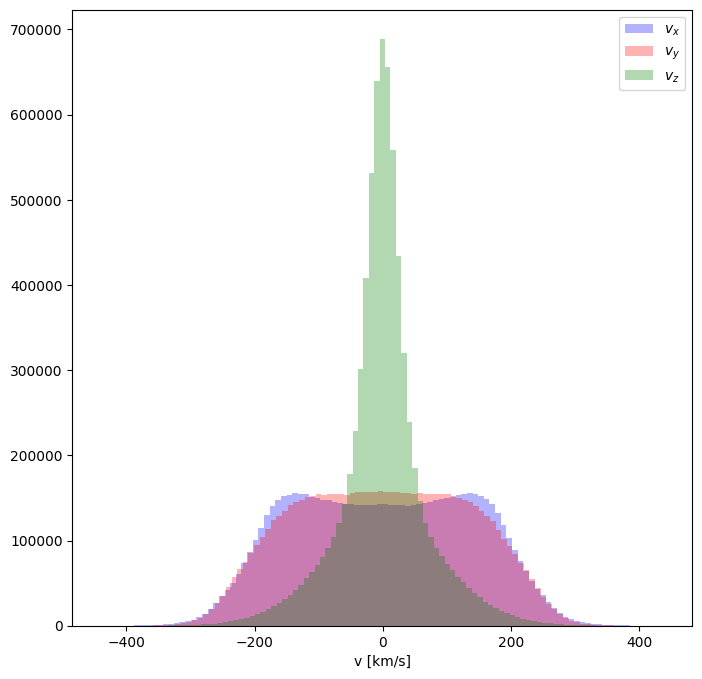

In [32]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(gaia['vx'],100, color = 'blue', alpha=0.3, label = r'$v_x$')
ax.hist(gaia['vy'],100, color = 'red', alpha=0.3, label =  r'$v_y$')
ax.hist(gaia['vz'],100, color = 'green', alpha=0.3, label =  r'$v_z$')
ax.legend()
ax.set_xlabel('v [km/s]')

# modelB3GaiaChallenge

Text(0.5, 0, 'v [km/s]')

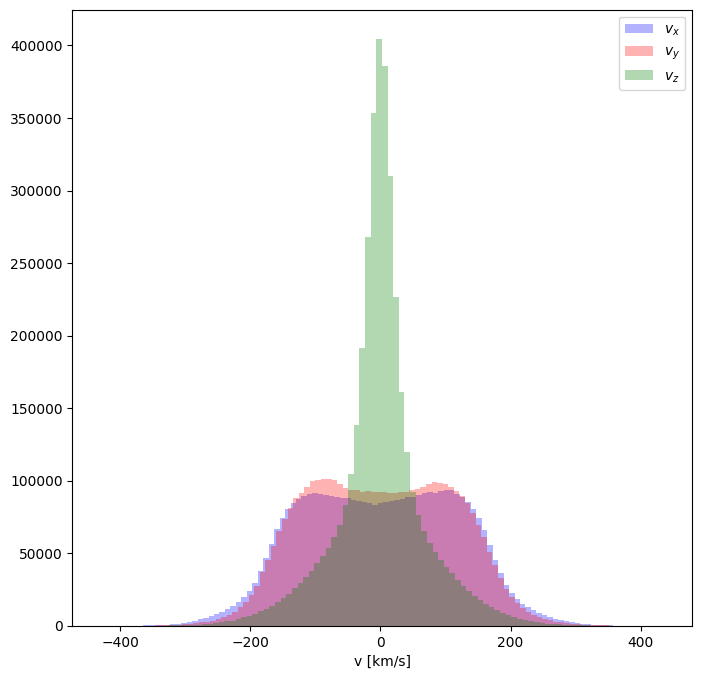

In [40]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(gaia['vx'],100, color = 'blue', alpha=0.3, label = r'$v_x$')
ax.hist(gaia['vy'],100, color = 'red', alpha=0.3, label =  r'$v_y$')
ax.hist(gaia['vz'],100, color = 'green', alpha=0.3, label =  r'$v_z$')
ax.legend()
ax.set_xlabel('v [km/s]')

In [33]:
v3d = gaia[['vx','vy','vz']]

In [34]:
def vtot(vx,vy,vz):
    return np.sqrt(vx**2+vy**2+vz**2)

In [ ]:
module_v = v3d.apply(lambda row : np.sqrt(row[0]**2+row[1]**2+row[2]**2), axis=1)

# modelR1GaiaChallenge

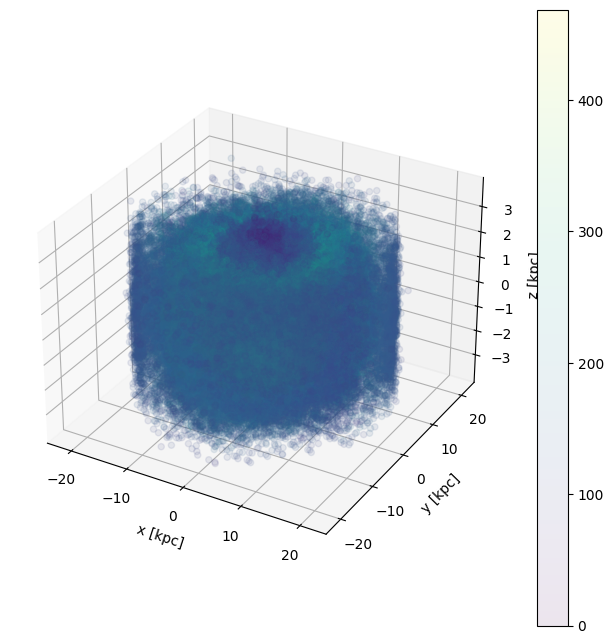

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf=ax.scatter(gaia['x'],gaia['y'],gaia['z'],c= module_v, vmin = module_v.min(), vmax= module_v.max(),
                alpha=0.1,depthshade=True)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
plt.colorbar(surf)
plt.show()

# modelB3GaiaChallenge 

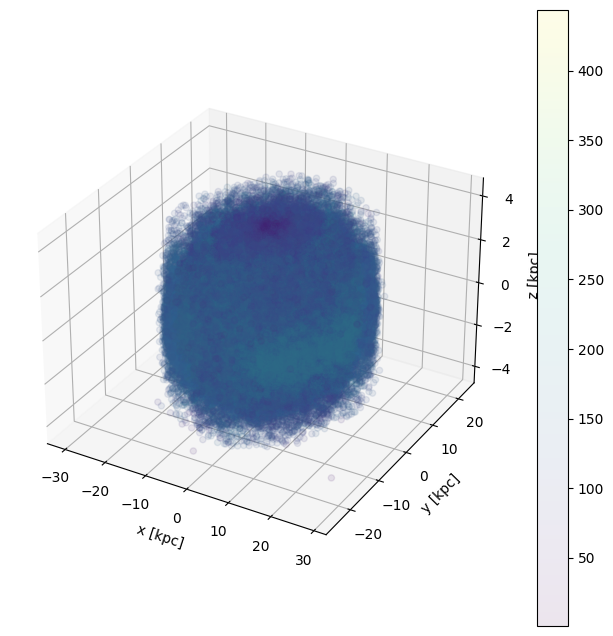

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf=ax.scatter(gaia['x'],gaia['y'],gaia['z'],c= module_v, vmin = module_v.min(), vmax= module_v.max(),
                alpha=0.1,depthshade=True)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
plt.colorbar(surf)
plt.show()

### LS metric using Gaia Data challenge simulations

In [12]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coor
from astropy.coordinates import (CartesianRepresentation,
                                 CartesianDifferential, Galactic)
import galpy.potential
from galpy.potential import NFWPotential, MiyamotoNagaiPotential, PowerSphericalPotentialwCutoff
from galpy.potential import evaluateDensities
Disk_pot= MiyamotoNagaiPotential(a=3./8*u.kpc,b=0.28/8*u.kpc,normalize=.6)
Halo_pot= NFWPotential(a=16/8*u.kpc,normalize=.35)
Bulge_pot= PowerSphericalPotentialwCutoff(alpha=1.8,rc=1.9/8*u.kpc,normalize=1.)

In [14]:
R, z, phi = np.linspace(-12,12,100), np.linspace(-10,10,100) ,30

### appling two different methods to compare gaia simulated position and 'observed' position

###### first method

In [9]:
def check_closest(X1,X2):
        dist = np.abs(X1[:, np.newaxis] - X2)
        return dist.argmin(axis=1)

In [81]:
import time
start = time.time()
dGaia = np.sqrt(gaia['x']**2+gaia['y']**2+gaia['z']**2)
dposition = np.sqrt(R**2+z**2)
idx_close_position = check_closest(dGaia.to_numpy(), dposition)
sample_vx = np.random.choice(gaia['vx'][idx_close_position], size= 5000)
sample_vy = np.random.choice(gaia['vy'][idx_close_position], size= 5000)
sample_vz = np.random.choice(gaia['vz'][idx_close_position], size= 5000)
total_sample_v = [sample_vx,sample_vy,sample_vz]
print('{} min'.format((time.time()-start)/60))

2.646927511692047 min


##### second method

In [13]:
start = time.time()
dGaia = np.sqrt(gaia['x']**2+gaia['y']**2+gaia['z']**2)
dposition = np.sqrt(R**2+z**2)
index_sorted = np.argsort(dGaia.to_numpy())
dGaia_sorted = dGaia.to_numpy()[index_sorted]
idx1 = np.searchsorted(dGaia_sorted, dposition)
idx2 = np.clip(idx1 - 1, 0, len(dGaia_sorted)-1)
#idx_close_position = check_closest(dGaia.to_numpy(), dposition)
sample_vx = np.random.choice(gaia['vx'][idx1], size= 5000)
sample_vy = np.random.choice(gaia['vy'][idx1], size= 5000)
sample_vz = np.random.choice(gaia['vz'][idx1], size= 5000)
total_sample_v = [sample_vx,sample_vy,sample_vz]
print('{} min'.format((time.time()-start)/60))

0.18264948924382526 min


Text(0.5, 0, 'v [km/s]')

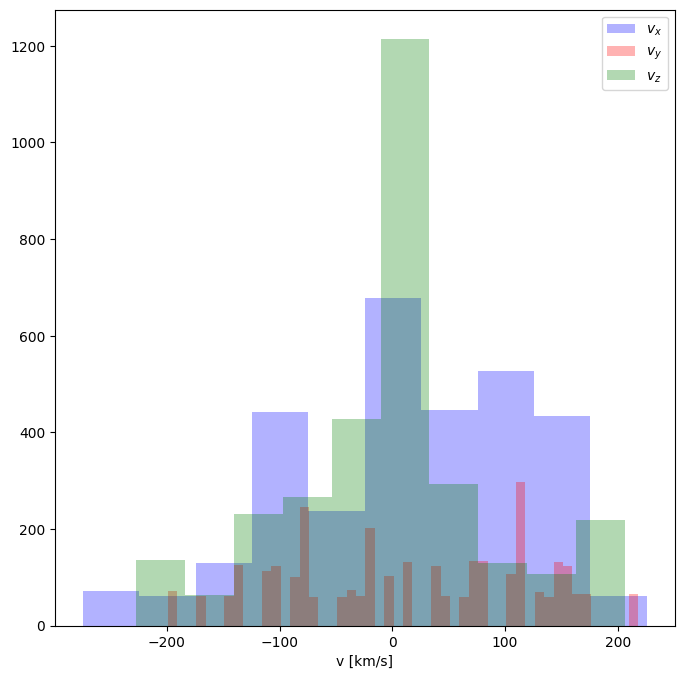

In [14]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(sample_vx,10, color = 'blue', alpha=0.3, label = r'$v_x$')
ax.hist(sample_vy,50, color = 'red', alpha=0.3, label =  r'$v_y$')
ax.hist(sample_vz,10, color = 'green', alpha=0.3, label =  r'$v_z$')
ax.legend()
ax.set_xlabel('v [km/s]')

In [82]:
%%time
Bulge_magdist = np.array(ascii.read('../Bulge.isc_sloan')['col6'])+5*np.log10(dposition[:,None]*10**2)+5 #for g band distribution
Disk_magdist = np.array(ascii.read('../Disk.isc_sloan')['col6'])+5*np.log10(dposition[:,None]*10**2)+5 #for g band distribution
Halo_magdist = np.array(ascii.read('../Halo.isc_sloan')['col6'])+5*np.log10(dposition[:,None]*10**2)+5 #for g band distribution
sample_mb = np.random.choice(Bulge_magdist.flatten(), Nbulge)
sample_md = np.random.choice(Disk_magdist.flatten(), Ndisk)
sample_mh = np.random.choice(Halo_magdist.flatten(), Nhalo)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 70.3 µs


Text(0.5, 0, 'mag')

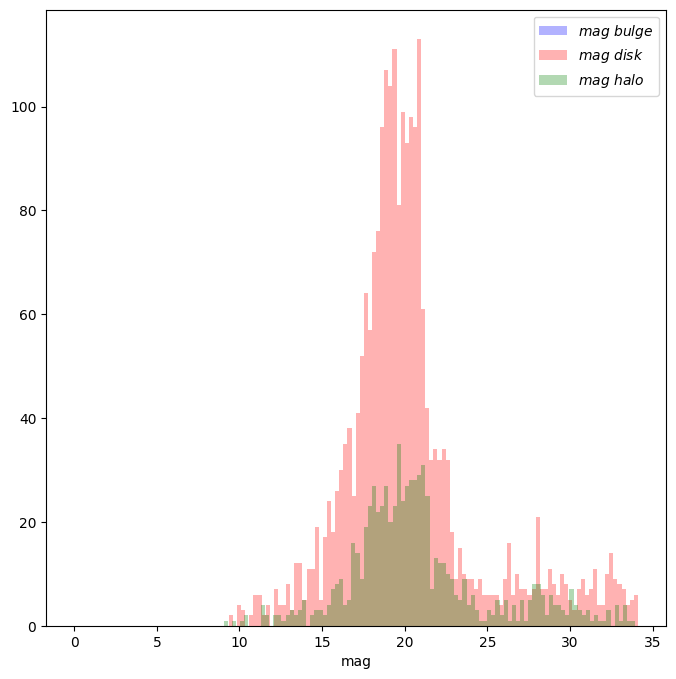

In [84]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.hist(sample_mb,100, color = 'blue', alpha=0.3, label = r'$mag ~bulge$')
ax.hist(sample_md,100, color = 'red', alpha=0.3, label =  r'$mag ~disk$')
ax.hist(sample_mh,100, color = 'green', alpha=0.3, label =  r'$mag ~halo$')
ax.legend()
ax.set_xlabel('mag')

### Simulated population

In [85]:
sample_v = list(map(lambda row : np.sqrt(row[0]**2+row[1]**2+row[2]**2),np.array(total_sample_v).T))
total_sample_m = list(itertools.chain.from_iterable([sample_mh,sample_mb,sample_md]))

Text(0, 0.5, 'v [km/s]')

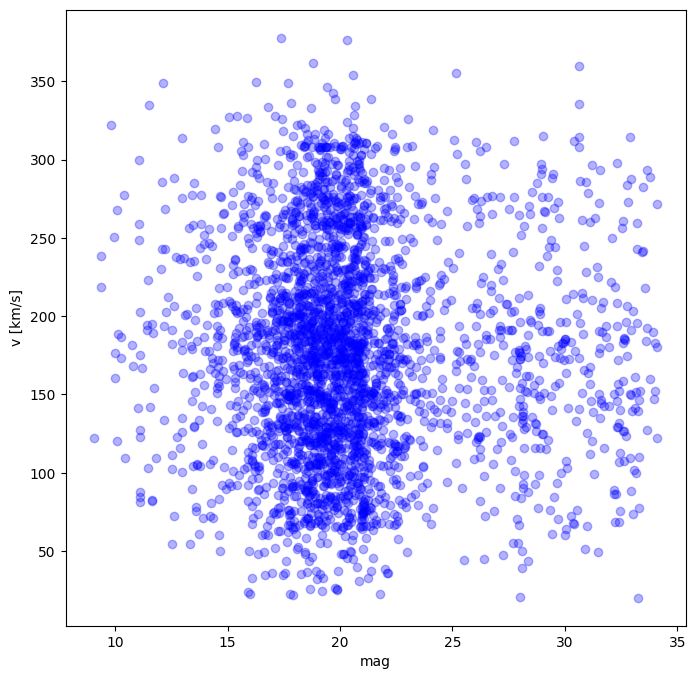

In [86]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.scatter(total_sample_m, sample_v, color = 'blue', alpha=0.3)
ax.set_xlabel('mag')
ax.set_ylabel('v [km/s]')

In [1]:
import numpy as np
import LSmetric_Gaia
import sys,os, glob, time, warnings, pickle
import rubin_sim.maf.db as db
from rubin_sim.maf.metrics import BaseMetric
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.stackers as stackers
import rubin_sim.maf.plots as plots
import rubin_sim.maf.metricBundles as metricBundles
from rubin_sim.maf.utils.mafUtils import radec2pix
from rubin_sim.maf.utils import m52snr, astrom_precision, sigma_slope
from rubin_sim.utils import hpid2RaDec, equatorialFromGalactic
import rubin_sim.maf.slicers as slicers
from rubin_sim.data import get_data_dir

# import convenience functions for MAF analysis on SciServer
#from opsimUtils import *

# print version
import rubin_sim
rubin_sim.__version__

your_username = os.getcwd().split('/')[5]
print(f'Your automatically extracted username is: {your_username}.'
    ' If it is incorrect, please mannually reset it.')

dbDir = '/home/idies/workspace/lsst_cadence/'
outDir = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/Anomaliesv2.0_WFD_LS_noDD_fiedlscheck_gaia'.format(your_username)

if not os.path.exists(os.path.abspath(outDir)):
    os.mkdir(os.path.abspath(outDir))

A new version of galpy (1.8.3) is available, please upgrade using pip/conda/... to get the latest features and bug fixes!
Your automatically extracted username is: fragosta. If it is incorrect, please mannually reset it.


In [2]:
resultDbs=db.ResultsDb(outDir)
dbrun = []
for folder in glob.glob(dbDir+'FBS_2.0_v2/*'):
    if os.path.isdir(folder):
        for sub in glob.glob(folder+'/*'):
            if os.path.isdir(sub):
                for subsub in glob.glob(sub+'/*.db'):
                    if 'v2.0_10yrs.db' in subsub:
                        dbrun.append(subsub)
            elif 'v2.0_10yrs.db' in sub:
                dbrun.append(sub)

In [3]:
init = 0
surveyDuration = 10
sqlconstraint ='note not like  "DD%" and night> {} and night<{}'.format(365*init,365*(init+surveyDuration))
ra,dec = np.random.uniform(0,360,5),np.random.uniform(-10,10,5)
slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True, badval=0)

In [4]:
metricLS10 = LSmetric_Gaia.LSPMmetric(metricName= 'LS10',f='g',m5Col='fiveSigmaDepth',sigma_threshold=3,
           mjdCol='observationStartMJD', seeingCol='seeingFwhmGeom',
           surveyduration = 10,dataout=True)
metricSkyLS10 = metricBundles.MetricBundle(metricLS10,slicer,sqlconstraint)

bundleDict= {'LS10': metricSkyLS10}

start of the run takes 0.3287670731544495 min


In [5]:
from tqdm import tqdm
# below I am only going to run metrics on the first five opsims
for run in tqdm([dbrun[0]]):     
    opsdb = db.OpsimDatabase(run)
    warnings.filterwarnings('ignore')
    for metrics_ in bundleDict:
        bundleDict[metrics_].setRunName(run)
    group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultDbs, dbTable='observations',)
    group.runAll()
    

  0% 0/1 [00:00<?, ?it/s]

simulation of population takes 0.08266278505325317 min
measure sigmapm takes 0.1949020822842916 min
selections take 0.00010979970296223959 min
measure likelihood score takes 1.22984250386556e-05 min
simulation of population takes 0.08104479312896729 min
measure sigmapm takes 0.044858670234680174 min
selections take 5.9771537780761716e-05 min
measure likelihood score takes 1.25885009765625e-05 min
simulation of population takes 0.08144252300262451 min
measure sigmapm takes 0.14507204691569012 min
selections take 8.3160400390625e-05 min
measure likelihood score takes 1.2691815694173177e-05 min
simulation of population takes 0.07955323855082194 min
measure sigmapm takes 0.12056271632512411 min
selections take 8.244514465332032e-05 min
measure likelihood score takes 1.2139479319254557e-05 min
simulation of population takes 0.08187747399012248 min
measure sigmapm takes 0.16879322131474814 min
selections take 0.00011147658030192057 min
measure likelihood score takes 1.2620290120442708e-05 mi

100% 1/1 [03:12<00:00, 192.88s/it]


In [6]:
import glob
redb = glob.glob(outDir+'/_home_idies*')

In [7]:
maf ={'LS10':{}}
for i,  surveyT in enumerate(['LS10']):#,'LS10']):
    j=0
    for dbout in redb:
        dout = np.load(dbout)
        dout.allow_pickle = True
        maf[surveyT][dbrun[j]]=dout['metricValues'][np.where(dout['mask']==False)]
        j+=1

In [9]:
data = maf['LS10']['/home/idies/workspace/lsst_cadence/FBS_2.0_v2/rolling/rolling_ns2_rw0.5_v2.0_10yrs.db']

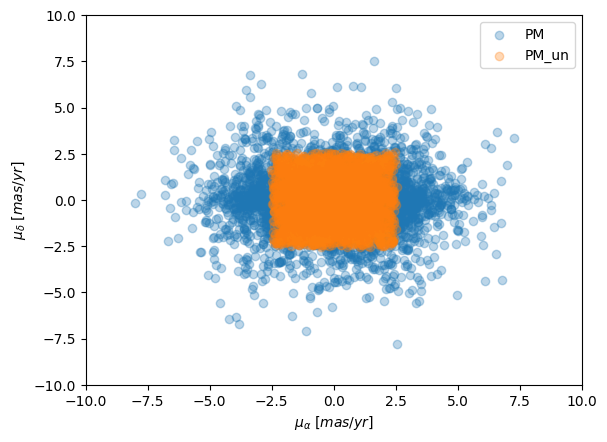

unusual detected fraction ~ 0.0


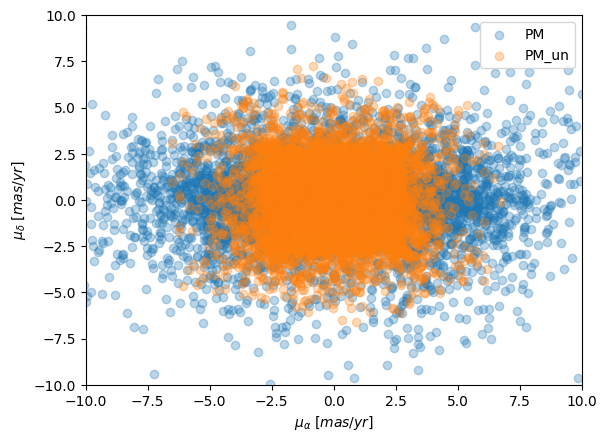

unusual detected fraction ~ 0.0


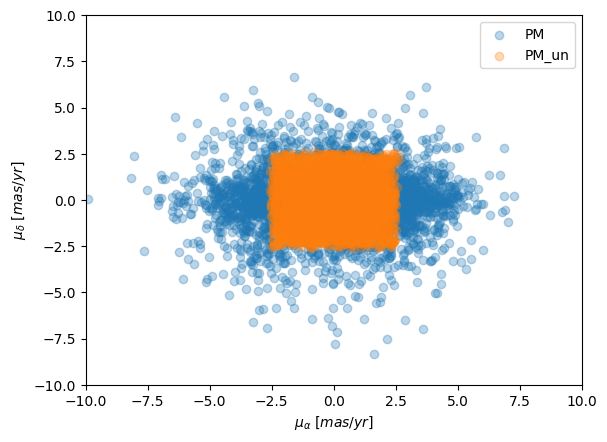

unusual detected fraction ~ 0.0


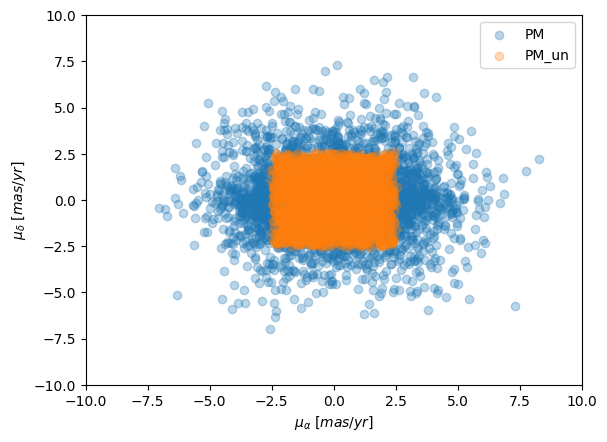

unusual detected fraction ~ 0.0


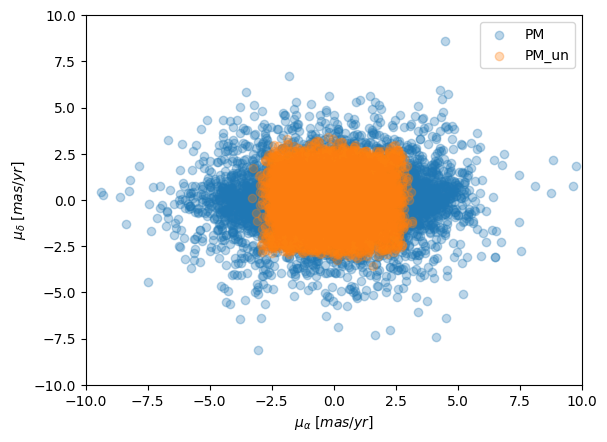

unusual detected fraction ~ 0.0


In [12]:
import matplotlib.pyplot as plt
for d in data:
    plt.scatter(d['PM'].pm_alpha,d['PM'].pm_delta, label='PM', alpha=0.3)
    plt.scatter(d['PM_un'].pm_alpha,d['PM_un'].pm_delta, label='PM_un', alpha=0.3)
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.xlabel(r'$\mu_{\alpha}$ '+r'$[mas/yr]$')
    plt.ylabel(r'$\mu_{\delta}$ '+r'$[mas/yr]$')
    plt.legend()
    plt.show()
    print('unusual detected fraction ~ {}'.format(d['detected']))